## Second Part__TFIM + ihxSx
#### The Effect of Various Imaginary External Bx on its Magnetic Properties

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import *
import scipy.sparse as sparse

In [2]:
Sx = np.array([[0,0.5],[0.5,0]])
Sy = np.array([[0,-0.5j],[0.5j,0]])
Sz = np.array([[0.5,0],[0,-0.5]])
I = np.array([[1,0],[0,1]])
sparse.csr_matrix(Sx)
sparse.csr_matrix(Sy)
sparse.csr_matrix(Sz)
sparse.csr_matrix(I)

# Useful algorithm: rotation
def Hx(N):
    M = [Sx]+ [I]*(N-1) + [Sx]+ [I]*(N-1)  #append: For example, [Sx, I, I, I] + [Sx, I, I, I] = [Sx, I, I, I, Sx, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hxx(N):
    M = [Sx]*2+ [I]*(N-2) + [Sx]*2+ [I]*(N-2)  #append: For example, [Sx, Sx, I, I] + [Sx, Sx, I, I] = [Sx, Sx, I, I, Sx, Sx, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hz(N):
    M = [Sz]+ [I]*(N-1) + [Sz]+ [I]*(N-1)  #append: For example, [Sz, I, I, I] + [Sz, I, I, I] = [Sz, I, I, I, Sz, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

4


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


6
8
10
12
14


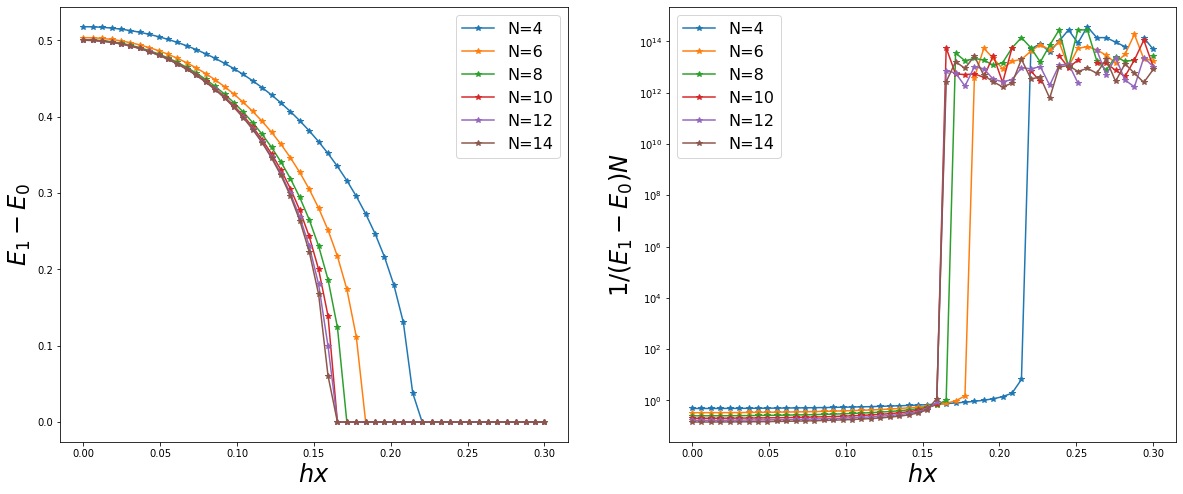

In [3]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10*2,8))
ax = ax.flatten()

for N in [4, 6, 8, 10, 12, 14]:
    print(N)
    hz = 1
    hx = np.linspace(0.0,0.3)
    J = 1
    lam = J/2
    E0 = np.zeros_like(hx, dtype = complex)
    E1 = np.zeros_like(hx, dtype = complex) 
    mx = np.zeros_like(hx, dtype = complex)
    mz = np.zeros_like(hx, dtype = complex) 
    sparse.csr_matrix(E0)
    sparse.csr_matrix(E1)
    sparse.csr_matrix(mx)
    sparse.csr_matrix(mz)

    for i in range(hx.shape[0]):
        H = -J*Hxx(N)-hz*Hz(N)-hx[i]*Hx(N)*1j
        w, v = eigs(H, 2, which='SR')
        w = np.sort_complex(w)
        E0[i] = np.real(w[0])
        E1[i] = np.real(w[1])
        mx[i] = np.real(v[:,1]@Hx(N)@v[:,0]/N)
        mz[i] = np.real(v[:,0]@Hz(N)@v[:,0]/N)  
    
    # gap
    ax[0].plot(hx, E1-E0, '*-',label='N={}'.format(N))
    ax[0].legend(fontsize=16)
    ax[0].set_xlabel(r'$hx$',fontsize=24)
    ax[0].set_ylabel(r'$E_1-E_0$',fontsize=24)
    ax[0].grid()
    
    # xi/L
    ax[1].plot(hx, 1/((E1-E0)*N), '*-', label='N={}'.format(N))
    ax[1].legend(fontsize=16)
    ax[1].set_xlabel(r'$hx$',fontsize=24)
    ax[1].set_ylabel(r'$1/(E_1-E_0)N$',fontsize=24)
    ax[1].semilogy()
    ax[1].grid()   

4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


6
8
10
12


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in cdouble_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in cdouble_scalars


14


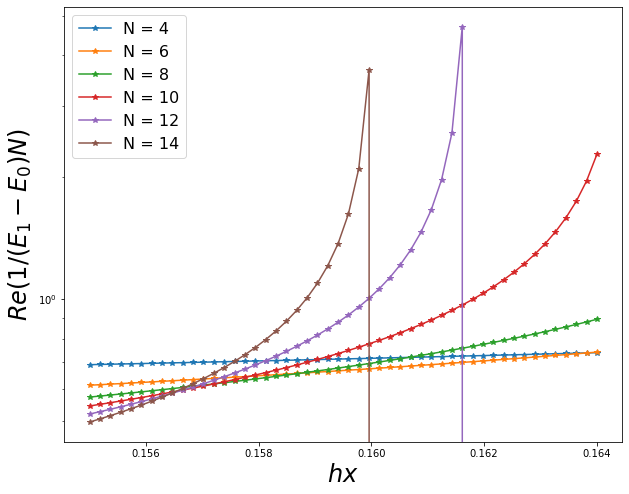

In [4]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
save = np.zeros([100, hx.shape[0]+1])
sparse.csr_matrix(save)
for N in [4, 6, 8, 10, 12, 14]:
    print(N)
    hx = np.linspace(0.155,0.164)
    E0 = np.zeros_like(hx, dtype = complex)
    E1 = np.zeros_like(hx, dtype = complex)
    xi = np.zeros_like(hx, dtype = complex)
    sparse.csr_matrix(E0)
    sparse.csr_matrix(E1)
    sparse.csr_matrix(xi)

    for i in range(hx.shape[0]):
        H = -J*Hxx(N)-hz*Hz(N)-hx[i]*Hx(N)*1j
        w, _ = eigs(H, 2, which='SR')
        w = np.sort_complex(w)
        E0[i] = np.real(w[0])
        E1[i] = np.real(w[1])
        if np.log(1/((E1[i]-E0[i])*N)) < 4:
            xi[i] = 1/((E1[i]-E0[i])*N)
            save[N][i] =  1/((E1[i]-E0[i])*N)
# xi/L
    ax.plot(hx, xi, '*-', label='N = {}'.format(N))
    ax.legend(fontsize=16)
    ax.set_xlabel(r'$hx$',fontsize=24)
    ax.set_ylabel(r'$Re(1/(E_1-E_0)N)$',fontsize=24)
    ax.semilogy()
    ax.grid()

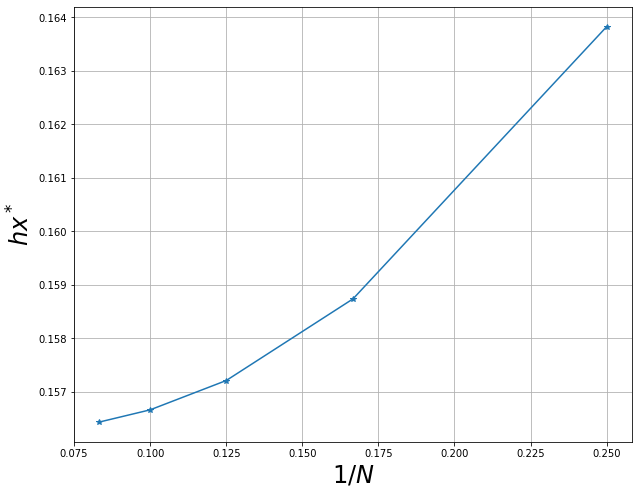

In [5]:
ig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
x = np.zeros(100)
for N in [4, 6, 8, 10, 12]:
    for i in range(hx.shape[0]):
        if ((save[N][i]-save[N+2][i])*(save[N][i+1]-save[N+2][i+1]) < 0) & (x[int((N-4)/2)] == 0):
            m1 = (save[N][i]-save[N][i+1])/(hx[i]-hx[i+1])
            m2 = (save[N+2][i]-save[N+2][i+1])/(hx[i]-hx[i+1])
            x[int((N-4)/2)] = (save[N+2][i]-save[N][i])/(m1 - m2) + hx[i]

Ns = [1/4, 1/6, 1/8, 1/10, 1/12]
# h*
ax.plot(Ns, x[:len(Ns)], '*-')
ax.set_xlabel(r'$1/N$',fontsize=24)
ax.set_ylabel(r'$hx^*$',fontsize=24)
ax.grid()

In [6]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*(x**(-b))+ c
xdata = np.array([4, 6, 8, 10, 12])
ydata = x[:len(xdata)]
popt, pcov = curve_fit(func, xdata, ydata)
print("[a, b, c] = ", popt)
critical_hx = popt[2]
print("The critical hx is: ",critical_hx)

[a, b, c] =  [0.28364623 2.58431758 0.15594129]
The critical hx is:  0.15594129178128874


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


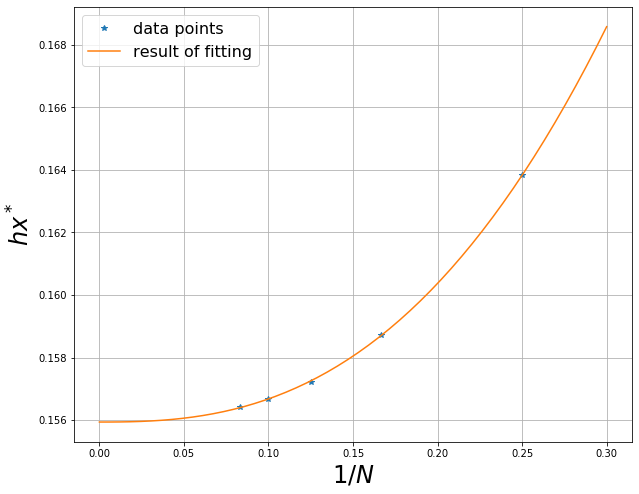

In [7]:
ig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
for N in [4, 6, 8, 10, 12]:
    for i in range(hx.shape[0]):
        if ((save[N][i]-save[N+2][i])*(save[N][i+1]-save[N+2][i+1]) < 0) & (x[int((N-4)/2)] == 0):
            m1 = (save[N][i]-save[N][i+1])/(hx[i]-hx[i+1])
            m2 = (save[N+2][i]-save[N+2][i+1])/(hx[i]-hx[i+1])
            x[int((N-4)/2)] = (save[N+2][i]-save[N][i])/(m1 - m2) + hx[i]

test_recipical_N = np.linspace(0, 0.3)

# h* fitting
ax.plot(1/np.array(xdata), x[:len(xdata)], '*', label='data points')
ax.plot(test_recipical_N, func(1/test_recipical_N, *popt), '-', label='result of fitting')
ax.legend(fontsize=16)
ax.set_xlabel(r'$1/N$',fontsize=24)
ax.set_ylabel(r'$hx^*$',fontsize=24)
ax.grid() 